# Task 51

US Arrest data from 1973 - produce a PCA report from the data.

In [24]:
# Import modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, silhouette_score

In [25]:
# Import data

data = pd.read_csv('UsArrests.csv')
data.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
# Inspect data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [27]:
# Check for missing data
data.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [28]:
# Get an overview of the data
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


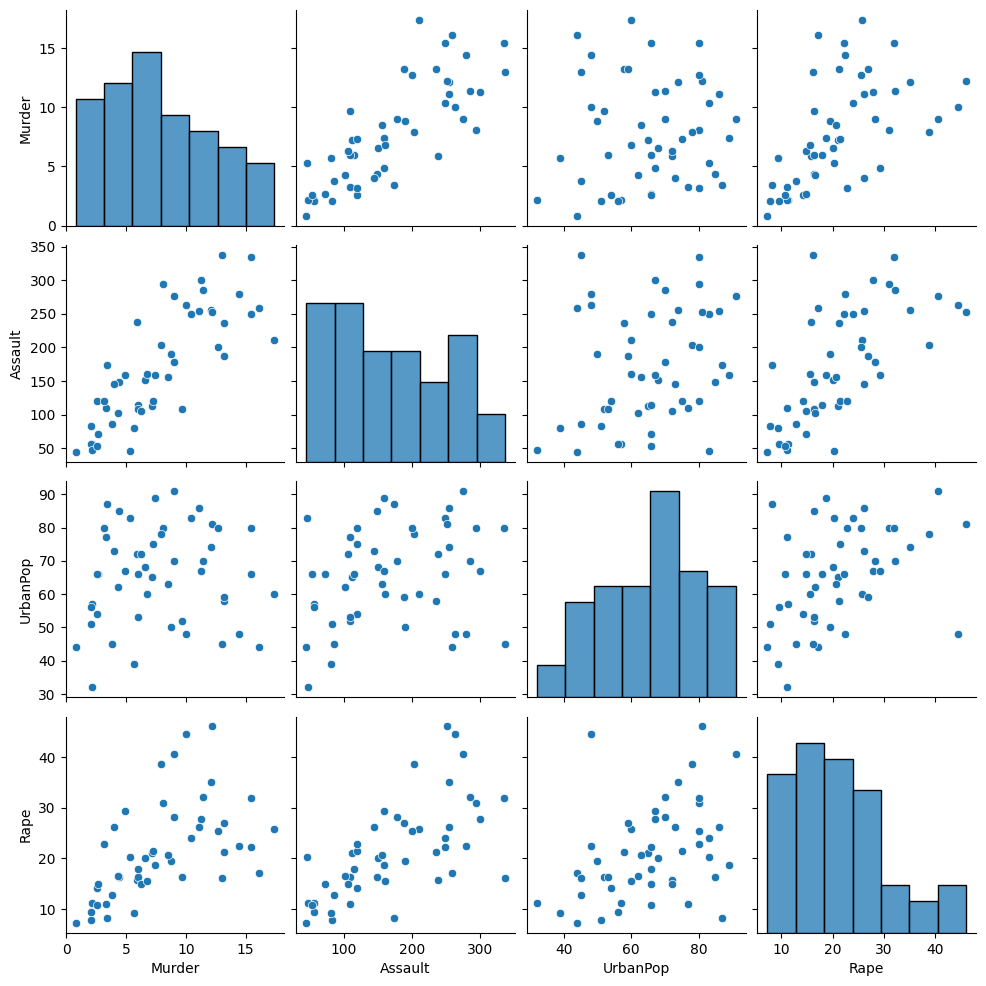

In [29]:
# Produce a scatterplot matrix
sns.pairplot(data)

The data is a bit one dimensional so I've decided to give it some additional context by adding the region to the dataset. 

source: https://www.infoplease.com/us/states/regions-of-the-us

In [30]:
# Add region data
regions = [[['New England'],['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']],
[['Middle Atlantic'],['Delaware', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania']],
[['South'],['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia']],
[['Midwest'],['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']],
[['Southwest'],['Arizona', 'New Mexico', 'Oklahoma', 'Texas']],
[['West'],['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming']]]

state_regions = {}
for list in regions:
    for city in data.City.values:
        if city in list[1]:
            state_regions[city] = list[0][0]

data['Region'] = data.apply(lambda x: state_regions[x.City], axis=1)

data.head()

,City,Murder,Assault,UrbanPop,Rape,Region
0,Alabama,13.2,236,58,21.2,South
1,Alaska,10.0,263,48,44.5,West
2,Arizona,8.1,294,80,31.0,Southwest
3,Arkansas,8.8,190,50,19.5,South
4,California,9.0,276,91,40.6,West


In [31]:
# Check that the data still has no null values
data.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
Region      0
dtype: int64

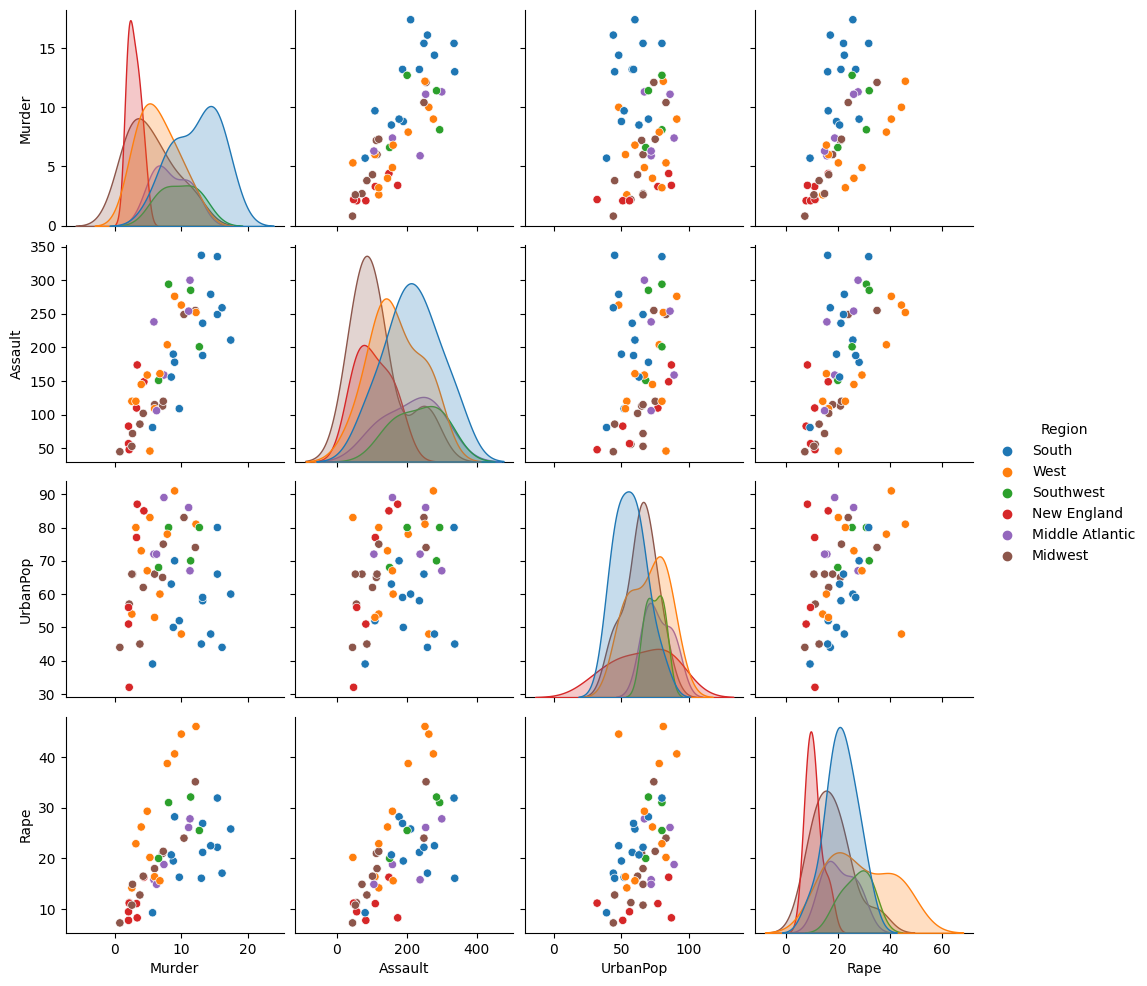

In [32]:
# Create a scatterpot matrix with the region data as additional context
sns.pairplot(data, hue='Region')

/var/folders/qg/hv_3mdgs1pn_k_mqhd7k6_f80000gn/T/ipykernel_13218/2689832373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

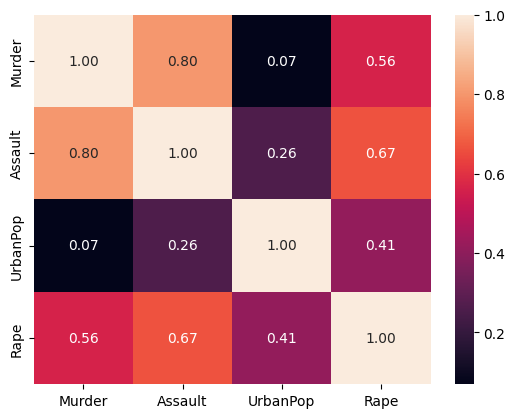

In [33]:
# Produce a correlation heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f")

# PCA

In [34]:
# Scale values
X_data = data.drop(['City','Region'], axis=1)
X = StandardScaler().fit_transform(X_data.values)

[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


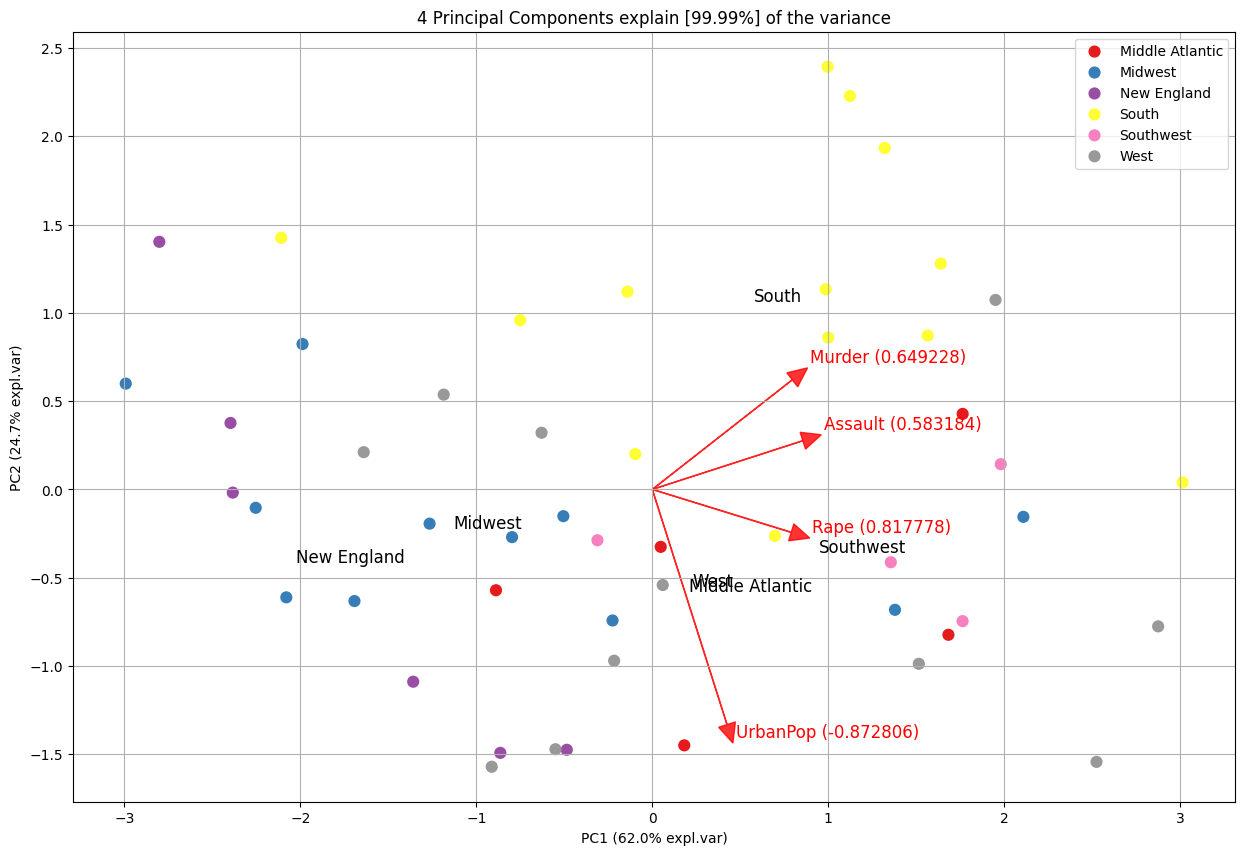

       Murder   Assault  UrbanPop      Rape
PC1  0.535899  0.583184  0.278191  0.543432
PC2  0.418181  0.187986 -0.872806 -0.167319
PC3 -0.341233 -0.268148 -0.378016  0.817778
PC4  0.649228 -0.743407  0.133878  0.089024
['City' 'Murder' 'Assault' 'UrbanPop' 'Rape' 'Region']


In [35]:
# Generate principal components
arrests_pca = pca(n_components=4)
results = arrests_pca.fit_transform(X, col_labels=X_data.columns.values, row_labels=data.Region.values)
#['Murder','Assault','UrbanPop','Rape']
# Generate biplot
arrests_pca.biplot()
plt.show()

print(results['loadings'])
print(data.columns.values)

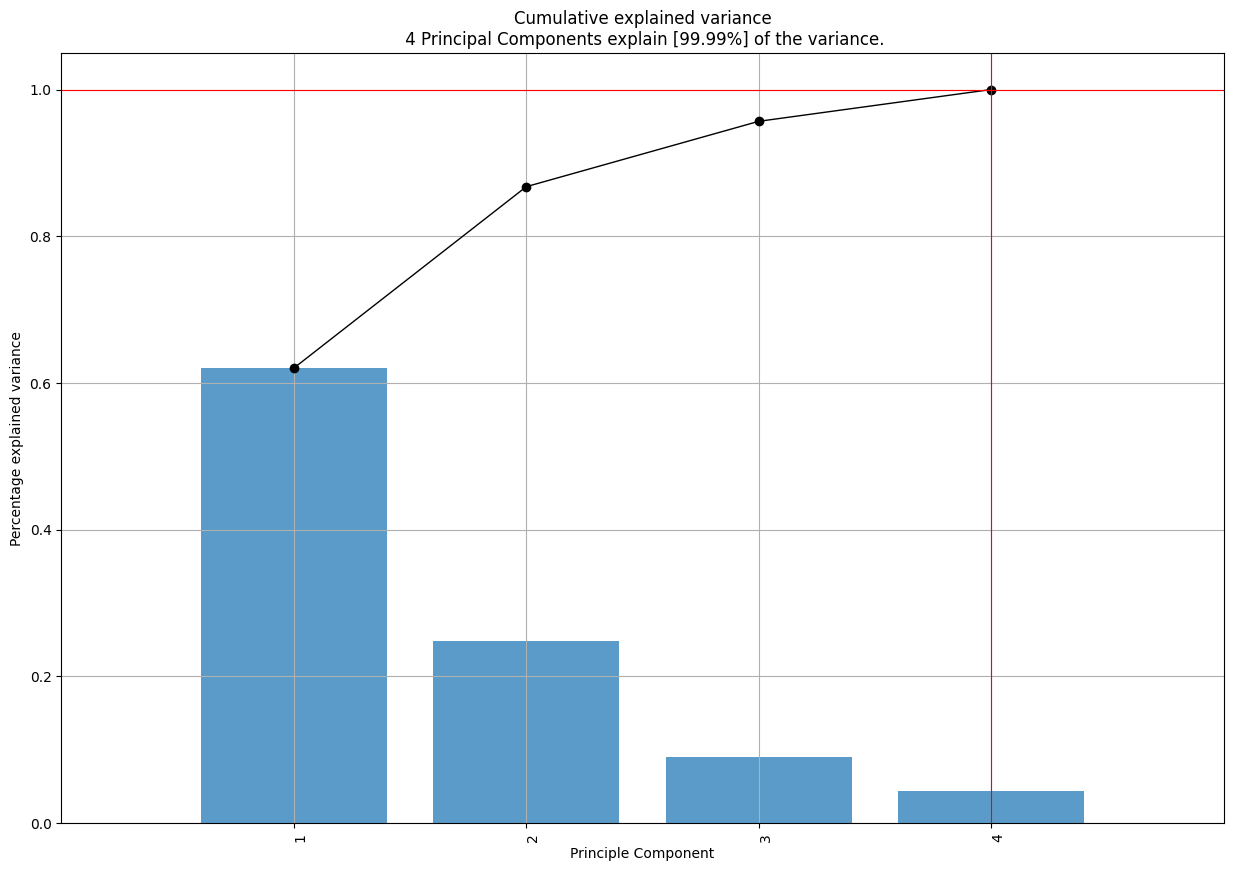

<Figure size 640x480 with 0 Axes>

In [36]:
# Plot the cumulative variance for the principal components
arrests_pca.plot()
plt.show()

In [37]:
# Show the top features
arrests_pca.results['topfeat']

,PC,feature,loading,type
0,PC1,Assault,0.583184,best
1,PC2,UrbanPop,-0.872806,best
2,PC3,Rape,0.817778,best
3,PC4,Assault,-0.743407,best
4,PC4,Murder,0.649228,weak


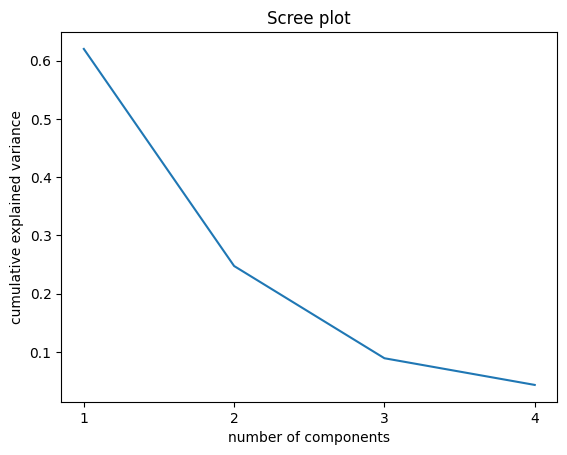

In [38]:
# Calculate PCA using the SKLearn library for the ease of producing a scree plot
pca_scree = PCA()
arrests_pca_scree = pca_scree.fit_transform(X)

# Generate scree plot
plt.plot(pca_scree.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.xticks(range(4), [i+1 for i in range(4)])
plt.show()

## Hierarchical clustering

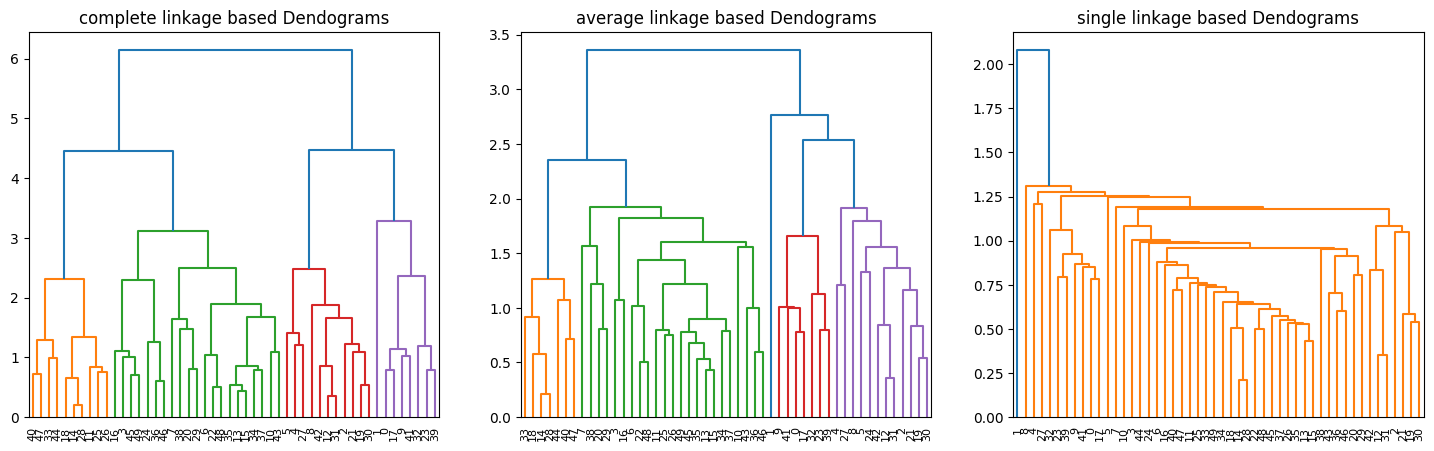

In [39]:
# Plot dendograms for each linkage method
plt.figure(figsize=[18,5])

linkage_types = ['complete', 'average', 'single']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  dend = dendrogram(linkage(X, method=l))
  plt.title(f"{l} linkage based Dendograms") 

Text(0.5, 1.0, 'Complete linkage based Dendograms')

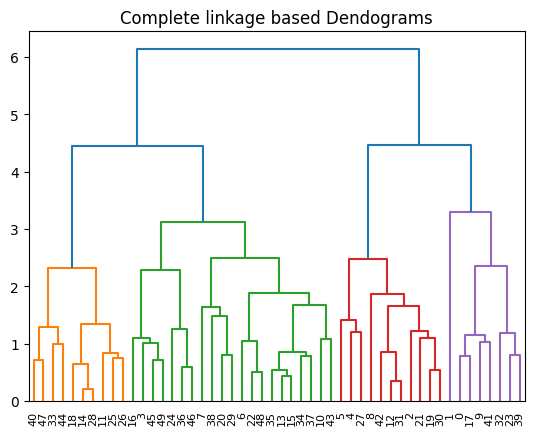

In [40]:
dend = dendrogram(linkage(X, method="complete"))
plt.title(f"Complete linkage based Dendograms") 

In [41]:
# Create a dataset to plot graphs with below
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage="complete")
cluster.fit_predict(X)

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

## Kmeans

In [42]:
# Create datasets for the two plots identified above
cols = ['PC1','PC2']
regions = results["PC"].index.values
PCAs = results["PC"]
X1 = PCAs[cols].values

# Build KMeans models for the two datasets using k=3
kmeans = KMeans(n_clusters=4, random_state=42)
pred = kmeans.fit_predict(X1)


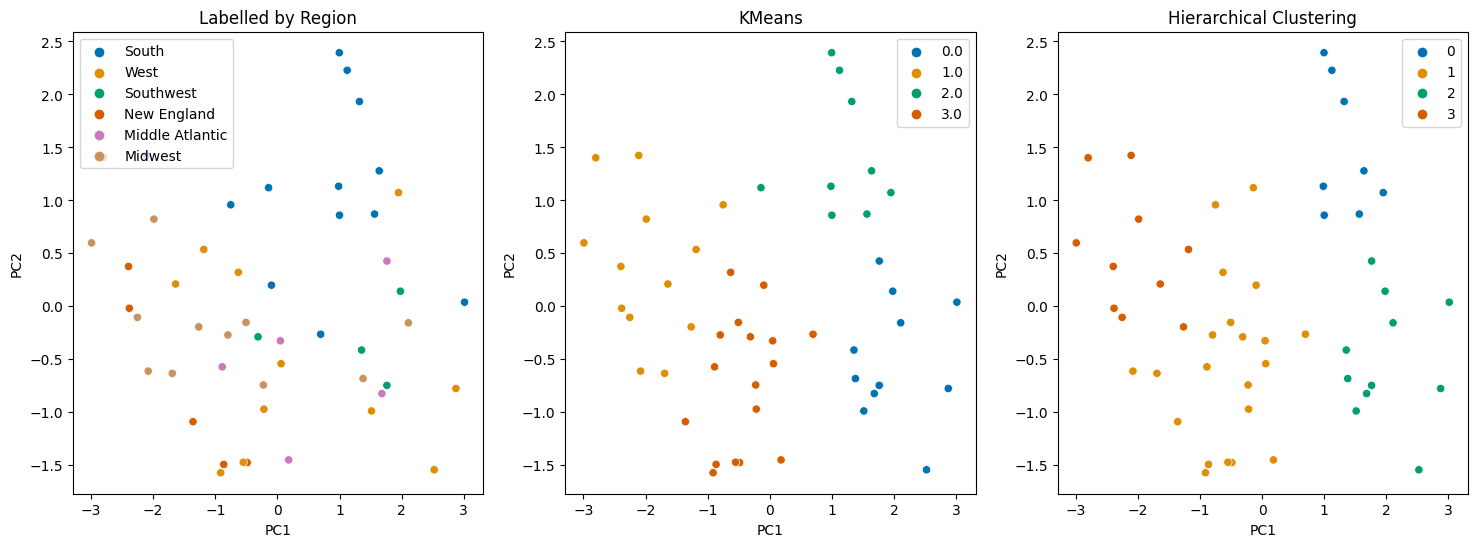

In [43]:
# Create the scatterplot
P1 = np.concatenate((X1,pred.reshape(-1,1)),axis=1)  # Join the features and results
P1_plot = pd.DataFrame(P1)

plt.figure(figsize=[18,6])
sns.color_palette("Set2")

# Subplot 1 - Raw Data
plt.subplot(1, 3, 1)
sns.scatterplot(x=P1_plot[0], y=P1_plot[1], hue=regions, palette='colorblind')
plt.title('Labelled by Region')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Subplot 2 - KMeans clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x=P1_plot[0], y=P1_plot[1], hue=P1_plot[2], palette='colorblind')
score1 = round(silhouette_score(X1, kmeans.labels_, metric='euclidean'),2)  # Calculate the silhouette score
plt.title('KMeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Subplot 3 - Hierarchical clustering
plt.subplot(1, 3, 3)
sns.scatterplot(x=P1_plot[0], y=P1_plot[1], hue=cluster.labels_, palette='colorblind')
plt.title('Hierarchical Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


plt.show()

## Analysis of the different clusters

It was hoped that by adding the region dimension to the data that it would have naturally produced some more pronounced clusters but the trends in the data aren't as clear cut as we might have liked.

Both the KMeans and Hierarchical clustering methods have produced very similar patterns for the four clusters.

Visually inspecting them it would appear that the South Region is the most easily predictable with both methods producing a cluster (KMeans 2.0 & HC 0) that matches the cluster on the raw data fairly well.

It would be interesting to add more context to this dataset such as demographic data, incomes, education and so on to see if there are other patterns that could be predicted using these methods.